# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [2]:
library('tidyverse')

# Hollywood Age Gaps

From Tidy Tuesday 2023-02-14

In [3]:
# Import dataset from Tidy Tuesday Github
age_gaps = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-14/age_gaps.csv',
                    col_types = cols())

age_gaps |> head()

movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<dbl>,<dbl>
Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23
Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24
The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20
The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23
Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38
Poison Ivy,1992,Katt Shea,42,1,Tom Skerritt,Drew Barrymore,man,woman,1933-08-25,1975-02-22,59,17


# How many movies per release year does the dataset contain?

To better understand what the Hollywood Age Gaps dataset captures, we begin by visually exploring the number of movies per release year that are included in the dataset. The earliest movies in the dataset were released in 1935, while the most recent movies were released in 2022. Notably, the dataset includes many more movies from 1995 and onward. The earlier years (before 1995) are each represented by at most 5-10 movies, whereas many of the more recent years (1995 and onward) are represented by as many as 30-50 movies. This feature of the data is important to take into account in interpretations moving forward, as the data is not equally represented of all years from 1935 to 2022, despite containing data that span this whole period. Discrepancies in the number of movies per release year included in the dataset may reflect difficulties with accessing historical data. Limited data for 2019 to 2022 likely reflects that this dataset was originally published by Data is Plural in February 2018.

In [4]:
# Determine earliest and latest release years included
age_gaps |> 
    arrange(release_year) |> 
    head()

age_gaps |> 
    arrange(desc(release_year)) |> 
    head()

movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<dbl>,<dbl>
Star of Midnight,1935,Stephen Roberts,19,1,William Powell,Ginger Rogers,man,woman,1892-06-29,1911-07-16,43,24
Captain Blood,1935,Michael Curtiz,7,1,Errol Flynn,Olivia de Havilland,man,woman,1909-06-20,1916-07-01,26,19
Modern Times,1936,Charlie Chaplin,21,1,Charlie Chaplin,Paulette Goddard,man,woman,1889-04-16,1910-06-03,47,26
Stella Dallas,1937,King Vidor,12,1,John Boles,Barbara Stanwyck,man,woman,1895-10-28,1907-07-16,42,30
A Star Is Born,1937,William A. Wellman,9,3,Fredric March,Janet Gaynor,man,woman,1897-08-31,1906-10-06,40,31
Stella Dallas,1937,King Vidor,1,2,Anne Shirley,Tim Holt,woman,man,1918-04-17,1919-02-05,19,18


movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<dbl>,<dbl>
The Bubble,2022,Judd Apatow,21,1,Pedro Pascal,Maria Bakalova,man,woman,1975-04-02,1996-06-04,47,26
The Northman,2022,Robert Eggers,20,1,Alexander Skarsgard,Anya Taylor-Joy,man,woman,1976-08-25,1996-04-16,46,26
The Lost City,2022,"Adam Nee, Aaron Nee",16,1,Sandra Bullock,Channing Tatum,woman,man,1964-07-26,1980-04-26,58,42
Everything Everywhere All at Once,2022,"Dan Kwan, Daniel Scheinert",9,1,Michelle Yeoh,Ke Huy Quan,woman,man,1962-08-06,1971-08-20,60,51
Top Gun: Maverick,2022,Joseph Kosinski,8,1,Tom Cruise,Jennifer Connelly,man,woman,1962-07-03,1970-12-12,60,52
Free Guy,2021,Shawn Levy,17,1,Ryan Reynolds,Jodie Comer,man,woman,1976-10-23,1993-03-11,45,28


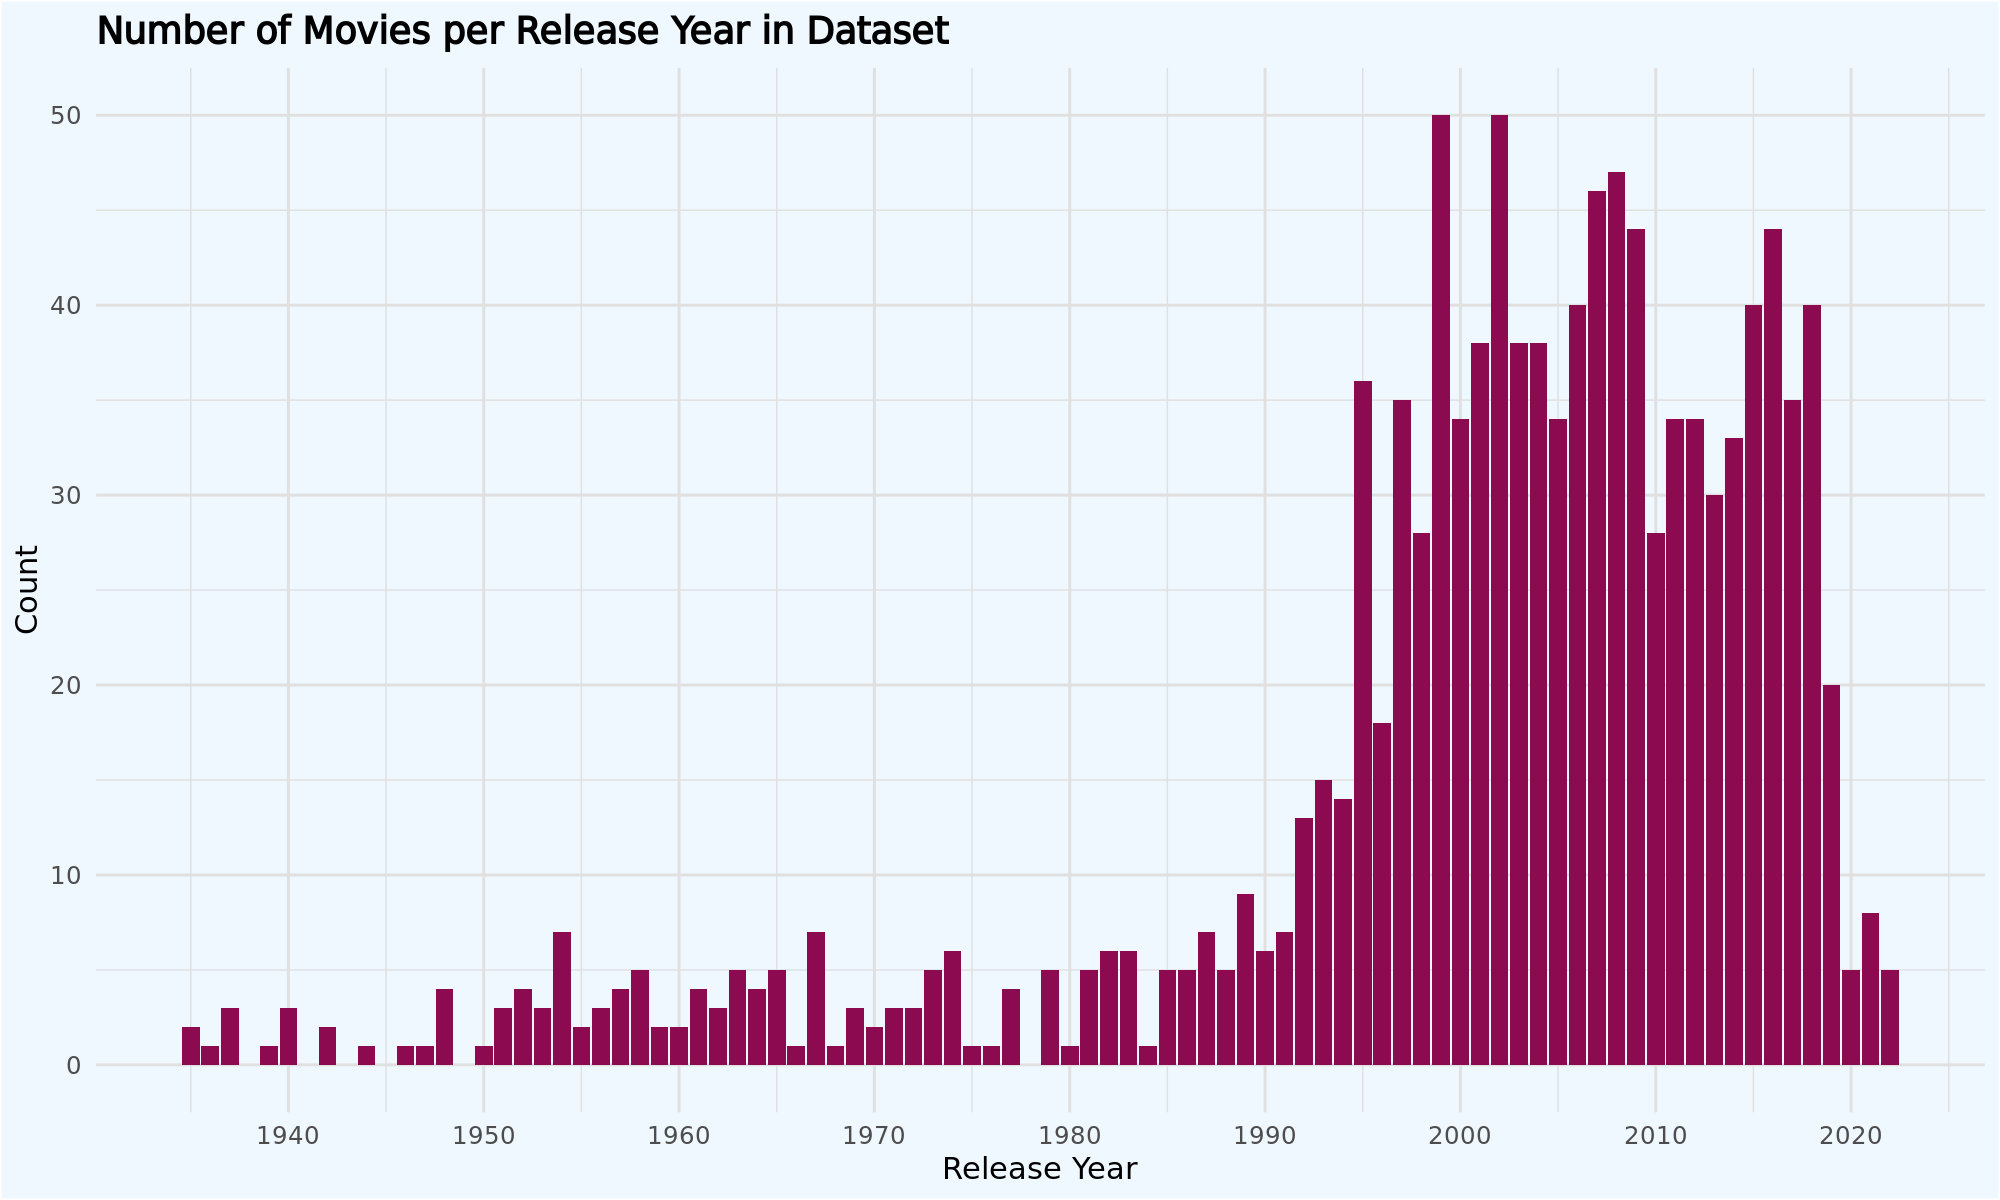

In [5]:
options(repr.plot.res = 200, repr.plot.width = 10, repr.plot.height = 6)

p = ggplot(age_gaps, aes(x = release_year)) + 
    geom_bar(fill = 'deeppink4') +
    labs(x = 'Release Year',
        y = 'Count', 
        title = 'Number of Movies per Release Year in Dataset') +
    scale_x_continuous(breaks = seq(1930, 2020, 10)) + 
    theme(plot.title = element_text(face = 'bold'),
         plot.background = element_rect(fill = 'aliceblue'),
         panel.background = element_rect(fill = 'aliceblue'),
         panel.grid.major = element_line(color = '#e0e0e0'),
         panel.grid.minor = element_line(color = '#e0e0e0'),
         axis.ticks = element_blank())

p

# How does the age difference between charactors change by movie release year?

The scatterplot below depicts the relationship between a movie's release year and the age difference between the two (or more) characters who play love interests in the movie. This dataset includes actors who play actual love interests (not friends, coworkers, or other non-romantic relationships), are all at least 17 years of age, and are not animated characters. Each point in the scatterplot represents one movie, with jittering applied for readability. The gender of the older character is identified by the color of the point, with blue denoting a man and red denoting a woman. From the plot, we see that the gender of the older character is more often a man, based on this dataset. Moreover, in the cases in which the woman is older, the age difference tends to be less, with more of the red points clustering between an age difference of 0 to 10 years.

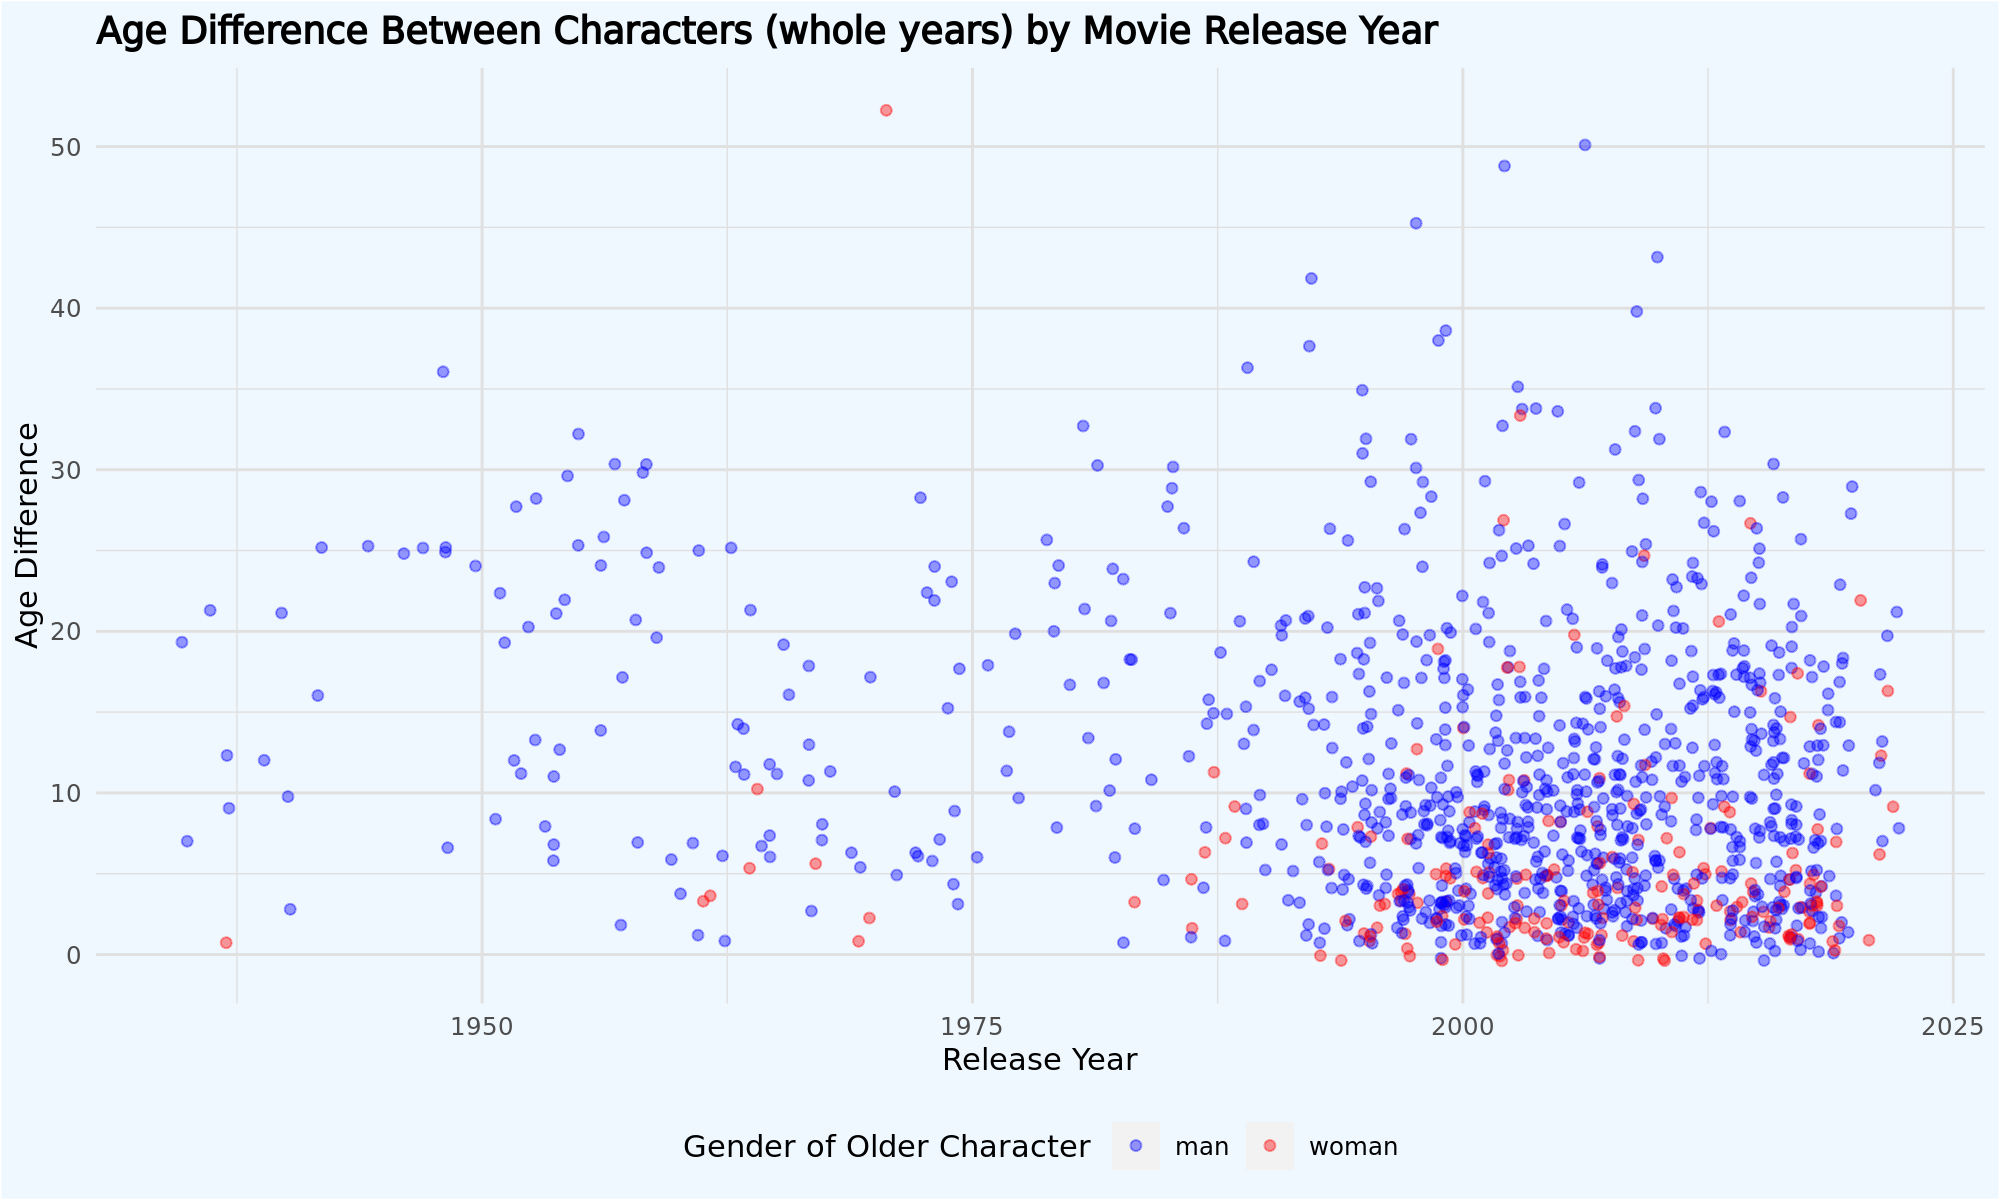

In [6]:
options(repr.plot.res = 200, repr.plot.height = 6, repr.plot.width = 10)

colors = c('#0000FF', '#FF0000')

p = ggplot(age_gaps, aes(x = release_year, y = age_difference, color = character_1_gender)) + 
    geom_point(alpha = 0.4, position="jitter") + 
    scale_color_manual(values = colors) +
    labs(x = 'Release Year', 
         y = 'Age Difference', 
         color = 'Gender of Older Character', 
         title='Age Difference Between Characters (whole years) by Movie Release Year') +
    theme(plot.title = element_text(face = 'bold'),
         plot.background = element_rect(fill = 'aliceblue'),
         panel.background = element_rect(fill = 'aliceblue'),
         legend.background = element_rect(fill = 'aliceblue'),
         legend.position = 'bottom',
         panel.grid.major = element_line(color = '#e0e0e0'),
         panel.grid.minor = element_line(color = '#e0e0e0'),
         axis.ticks = element_blank())

p

# How are the older and younger actor's ages distributed?

Using the empirical cumulative density function (ECDF), the density plots below display the distributions of the older and younger actor's age, respectively, at the time of film release. Due to the skewed distribution for both ages, median was chosen as a measure of center rather than mean. The median age of the older actor is 39, while the median age of the younger actor is 29, which are overlaid on the two charts. The range of ages for the older and younger Hollywood actors are similar despite a 10-year difference in the median age.

In [7]:
# Calculate mean & median age of actor 1
age_gaps_ecdf_1 = age_gaps |> 
    mutate(mean_age_1 = mean(actor_1_age), median_age_1 = median(actor_1_age)) 

age_gaps_ecdf_1 |> head()

movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age,mean_age_1,median_age_1
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23,40.6355,39
Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24,40.6355,39
The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20,40.6355,39
The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23,40.6355,39
Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38,40.6355,39
Poison Ivy,1992,Katt Shea,42,1,Tom Skerritt,Drew Barrymore,man,woman,1933-08-25,1975-02-22,59,17,40.6355,39


In [8]:
# Calculate mean & median age of actor 2
age_gaps_ecdf_2 = age_gaps |> 
    mutate(mean_age_2 = mean(actor_2_age), median_age_2 = median(actor_2_age)) 

age_gaps_ecdf_2 |> head()

movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age,mean_age_2,median_age_2
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23,30.21126,29
Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24,30.21126,29
The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20,30.21126,29
The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23,30.21126,29
Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38,30.21126,29
Poison Ivy,1992,Katt Shea,42,1,Tom Skerritt,Drew Barrymore,man,woman,1933-08-25,1975-02-22,59,17,30.21126,29


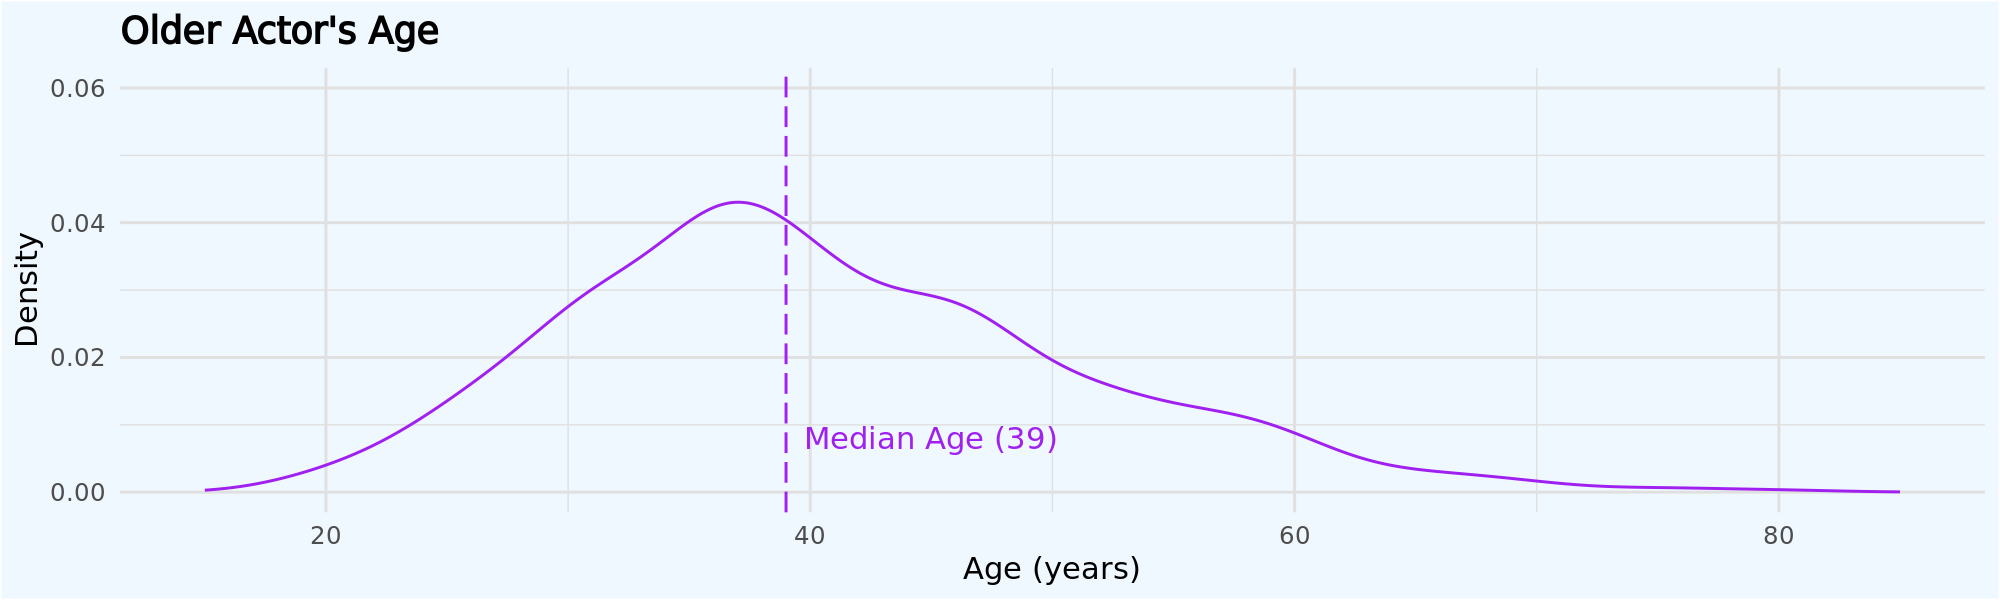

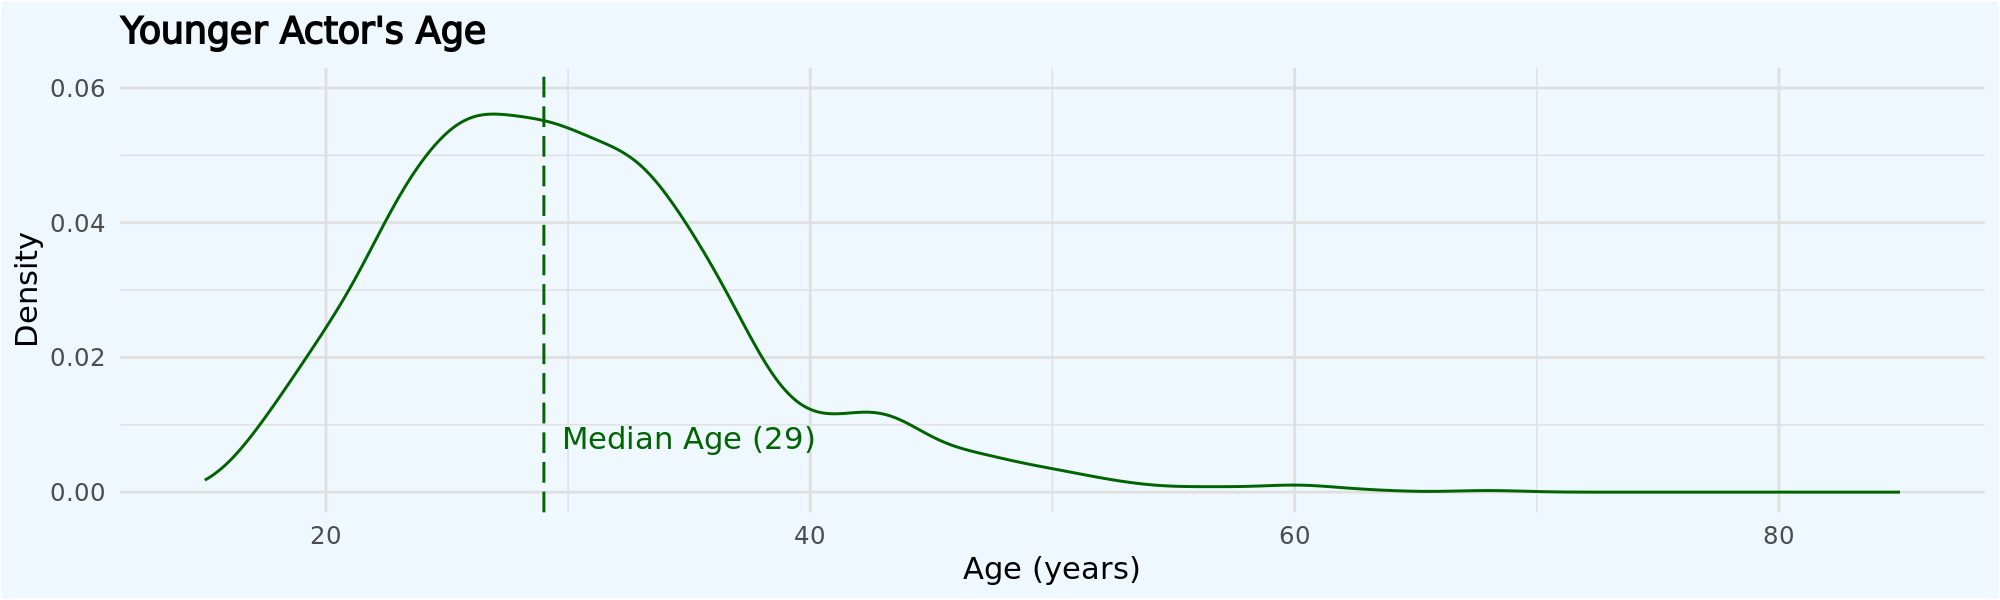

In [9]:
# ECDF distributions of older actor's age, younger actor's age with median age overlaid for each
options(repr.plot.res = 200, repr.plot.width = 10, repr.plot.height = 3)

p = ggplot(age_gaps_ecdf_1, aes(x = actor_1_age)) + 
    geom_density(alpha = 0.2, color = 'purple') + 
    geom_vline(aes(xintercept = median_age_1), color = 'purple', linetype='longdash') +
    xlim(15, 85) +
    ylim(0, .06) +
    labs(x = 'Age (years)',
         y = 'Density',
        title = "Older Actor's Age") +
    annotate(geom = 'text', x = 45, y = 0.008, label = 'Median Age (39)', color = 'purple') + 
    theme(plot.title = element_text(face = 'bold'),
         plot.background = element_rect(fill = 'aliceblue'),
         panel.background = element_rect(fill = 'aliceblue'),
         panel.grid.major = element_line(color = '#e0e0e0'),
         panel.grid.minor = element_line(color = '#e0e0e0'),
         axis.ticks = element_blank())

p

p2 = ggplot(age_gaps_ecdf_2, aes(x = actor_2_age)) + 
    geom_density(alpha = 0.2, color = 'darkgreen') + 
    geom_vline(aes(xintercept = median_age_2), color = 'darkgreen', linetype='longdash') +
    xlim(15, 85) +
    ylim(0, .06) +
    labs(x = 'Age (years)',
         y = 'Density',
        title = "Younger Actor's Age") + 
    annotate(geom = 'text', x = 35, y = 0.008, label = 'Median Age (29)', color = 'darkgreen') + 
    theme(plot.title = element_text(face = 'bold'),
         plot.background = element_rect(fill = 'aliceblue'),
         panel.background = element_rect(fill = 'aliceblue'),
         panel.grid.major = element_line(color = '#e0e0e0'),
         panel.grid.minor = element_line(color = '#e0e0e0'),
         axis.ticks = element_blank())

p2